In [2]:
import cv2
import matplotlib.pyplot as plt
from rembg import remove 
from PIL import Image
import numpy as np

In [3]:
path = "Image1/Capsule-shape/000031967.jpg"

In [4]:
img1 = Image.open(path)
img2 = remove(img1)

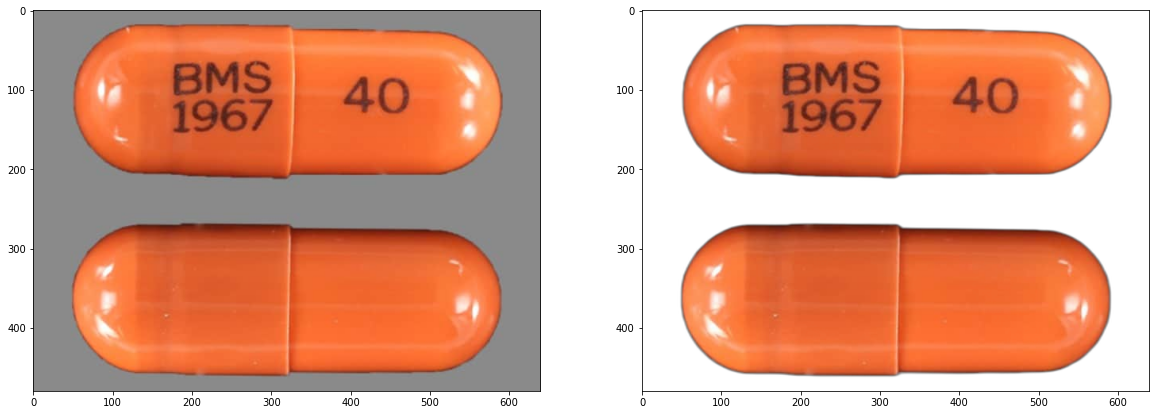

In [5]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)

In [6]:
img2.save("1.png")

In [7]:
img = cv2.imread('1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

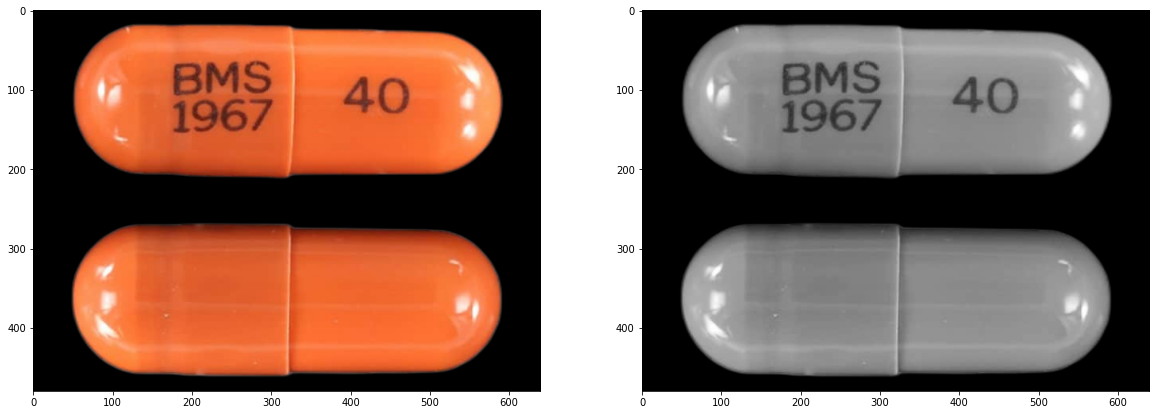

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(gray, cmap="gray")

In [9]:
# Apply a threshold to create a binary image
edged = cv2.Canny(gray, 30, 200)
ret, thresh = cv2.threshold(edged, 10, 255, cv2.THRESH_BINARY)

In [10]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

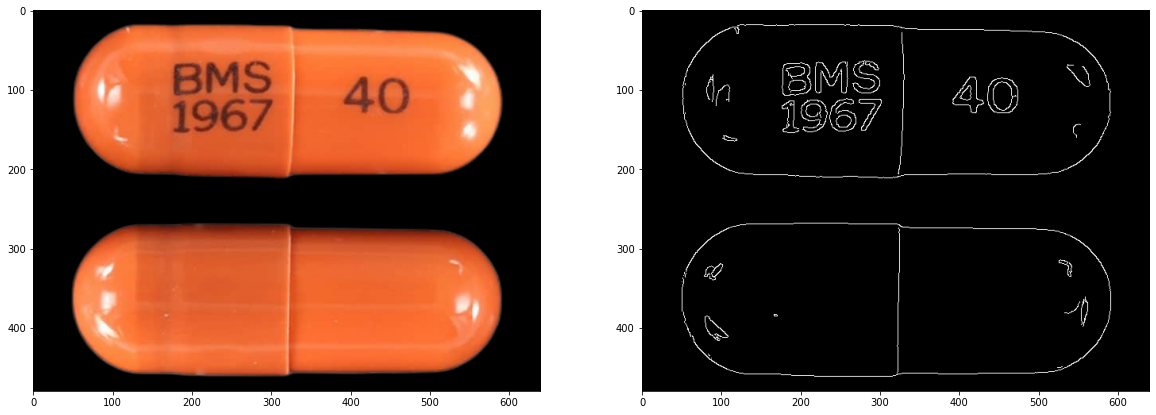

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(thresh, cmap="gray")

In [12]:
contours[0].shape

(12, 1, 2)

In [13]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image
# edged = cv2.Canny(gray, 30, 200)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
(contours, _) = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.ones(img.shape[:2], dtype="uint8") * 255

# Draw the contours on the mask
# cv2.drawContours(mask, contours, -1, 0, -1)

# remove the contours from the image and show the resulting images
img = cv2.bitwise_and(img, img, mask=mask)
# cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
# Display the image with the detected rectangles
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.6.0) /io/opencv/modules/highgui/src/window.cpp:1267: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [ ]:
import cv2
import numpy as np

img = cv2.imread('1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in range(len(contours)):
    x, y, width, height = cv2.boundingRect(contours[i])
    roi = img[y:y+height, x:x+width]
    cv2.imwrite(f"D1/d{i}.png", roi)

In [14]:
import cv2
import numpy as np
list_name = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_90_COUNTERCLOCKWISE]
img = cv2.imread('1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in range(len(contours)):
    x, y, width, height = cv2.boundingRect(contours[i])
    src = img[y:y+height, x:x+width]
    tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
    b, g, r = cv2.split(src)
    rgba = [b, g, r, alpha]
    dst = cv2.merge(rgba, 10)
    # print(dst.shape)
    if dst.shape[0] < dst.shape[1]:
        for j in list_name:
            dst1 = cv2.rotate(dst, j)
            cv2.imwrite(f"D1/1gfg{i}_{j}.png", dst1)
    else:
        cv2.imwrite(f"D1/1gfg{i}_{2}.png", dst)
    # cv2.imwrite(f"D1/d{i}.png", roi)

In [63]:
import cv2
import numpy as np

img = cv2.imread('1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in range(len(contours)):
    x, y, width, height = cv2.boundingRect(contours[i])
    src = img[y:y+height, x:x+width]
    tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
    b, g, r = cv2.split(src)
    rgba = [b, g, r, alpha]
    dst = cv2.merge(rgba, 10)
    print
    dst = cv2.rotate(dst, cv2.ROTATE_90_CLOCKWISE)
    cv2.imwrite(f"D1/1gfg{i}.png", dst)
    # cv2.imwrite(f"D1/d{i}.png", roi)

In [62]:
# Import the library OpenCV
import cv2

# Import the image
file_name = "D1/d1.png"

# Read the image
src = cv2.imread(file_name, 1)

# Convert image to image gray
tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Applying thresholding technique
_, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)

# Using cv2.split() to split channels
# of coloured image
b, g, r = cv2.split(src)

# Making list of Red, Green, Blue
# Channels and alpha
rgba = [b, g, r, alpha]

# Using cv2.merge() to merge rgba
# into a coloured/multi-channeled image
dst = cv2.merge(rgba, 10)

# Writing and saving to a new image
cv2.imwrite("D1/gfg_white.png", dst)


True

```python

import cv2
import numpy as np

# Load the image
img = cv2.imread('1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out contours that do not correspond to rectangles
shapes = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h
    if len(approx) == 4 and aspect_ratio > 0.8 and aspect_ratio < 1.2:
        shapes.append(approx)

# Draw the detected rectangles on the original image
cv2.drawContours(img, shapes, -1, (0, 255, 0), 3)

# Display the image with the detected rectangles
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to create a binary image
# edged = cv2.Canny(gray, 30, 200)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i ran g
x, y, width, height = cv2.boundingRect(contours[-1])
roi = img[y:y+height, x:x+width]

# Filter out contours that do not correspond to rectangles
# shapes = []
# for contour in contours:
#     approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
#     x, y, w, h = cv2.boundingRect(contour)
#     aspect_ratio = float(w) / h
#     if len(approx) == 4 and aspect_ratio > 0.8 and aspect_ratio < 1.2:
#         shapes.append(approx)

# # Draw the detected rectangles on the original image
# cv2.drawContours(img, shapes, -1, (0, 255, 0), 3)
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
# Display the image with the detected rectangles
cv2.imshow('img', roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Insert image

In [17]:

import cv2 

import numpy as np 

image2 = cv2.imread('background/image_convert3.jpg') 
image1=cv2.imread('D1/1gfg0_2.png')
# image1 = 1
# image1=np.resize(image1,image2.shape)
added_images = cv2.add(image1,image2)

error: OpenCV(4.6.0) /io/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


NameError: name 'image1' is not defined

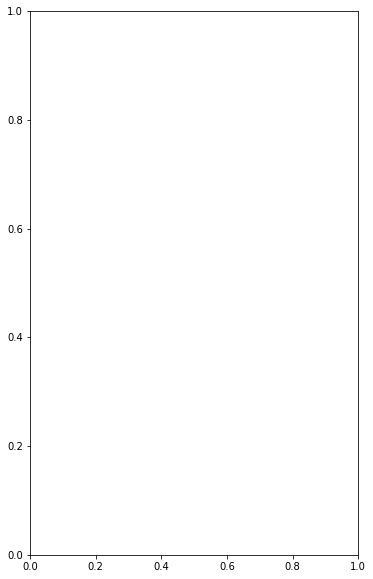

In [16]:
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.imshow(image1)
plt.subplot(132)
plt.imshow(image2)
plt.subplot(133)
plt.imshow(added_images)

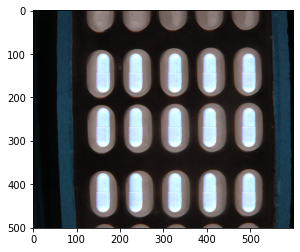

In [39]:
import cv2

background_img = cv2.imread('background/image_convert3.jpg')
overlay_img = cv2.imread('D1/1gfg0_2.png')
scale1 = 6
overlay_img = cv2.resize(overlay_img, (int(overlay_img.shape[1]/scale1), int(overlay_img.shape[0]/scale1)))

list_position_x = [145, 220, 310, 390, 480]
list_position_y = [100, 225, 375]

for i, x_offset in enumerate(list_position_x):
    for j, y_offset in enumerate(list_position_y):
        overlay_img_height, overlay_img_width, _ = overlay_img.shape
        background_img_height, background_img_width, _ = background_img.shape

        background_img_roi = background_img[y_offset:y_offset+overlay_img_height, x_offset:x_offset+overlay_img_width]
        result_img = cv2.add(background_img_roi, overlay_img)
        background_img[y_offset:y_offset+overlay_img_height, x_offset:x_offset+overlay_img_width] = result_img

cv2.imwrite("D1/data.png", background_img)
plt.imshow(background_img)

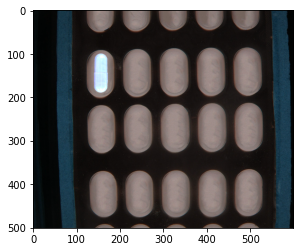

In [25]:
import cv2

background_img = cv2.imread('background/image_convert3.jpg')
overlay_img = cv2.imread('D1/1gfg0_2.png')
scale1 = 6
overlay_img = cv2.resize(overlay_img, (int(overlay_img.shape[1]/scale1), int(overlay_img.shape[0]/scale1)))

x_offset = 140
y_offset = 100

overlay_img_height, overlay_img_width, _ = overlay_img.shape
background_img_height, background_img_width, _ = background_img.shape

background_img_roi = background_img[y_offset:y_offset+overlay_img_height, x_offset:x_offset+overlay_img_width]
result_img = cv2.add(background_img_roi, overlay_img)
background_img[y_offset:y_offset+overlay_img_height, x_offset:x_offset+overlay_img_width] = result_img

cv2.imwrite("D1/data.png", background_img)
plt.imshow(background_img)

## Insert image in images with pillow.

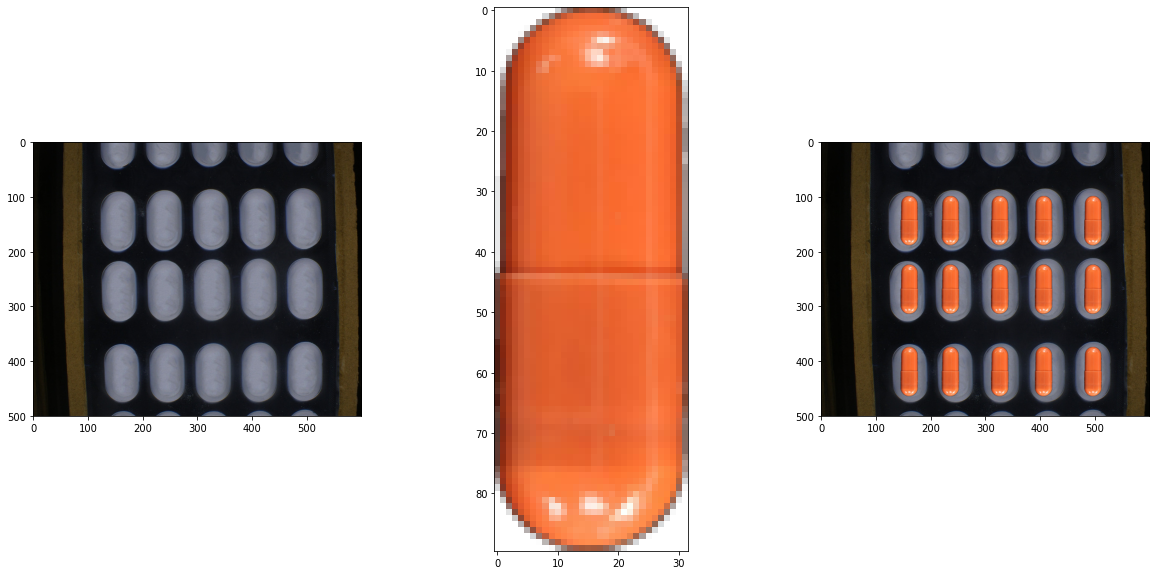

In [18]:
from PIL import Image, ImageFilter
scale = 6
im1 = Image.open('background/image_convert3.jpg')
im2 = Image.open('D1/1gfg0_2.png')

list_position_x = [145, 220, 310, 390, 480]
list_position_y = [100, 225, 375]

width, height = im2.size
im2 = im2.resize((int(width/scale), int(height/scale)))
im2 = im2.convert("RGBA")

back_im = im1.copy()
for i in list_position_x:
    for j in list_position_y:
        back_im.paste(im2, (i, j), im2)
back_im.save('D1/rocket_pillow_paste.png', quality=95,  format="png")
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(im1)
plt.subplot(132)
plt.imshow(im2)
plt.subplot(133)
plt.imshow(back_im)

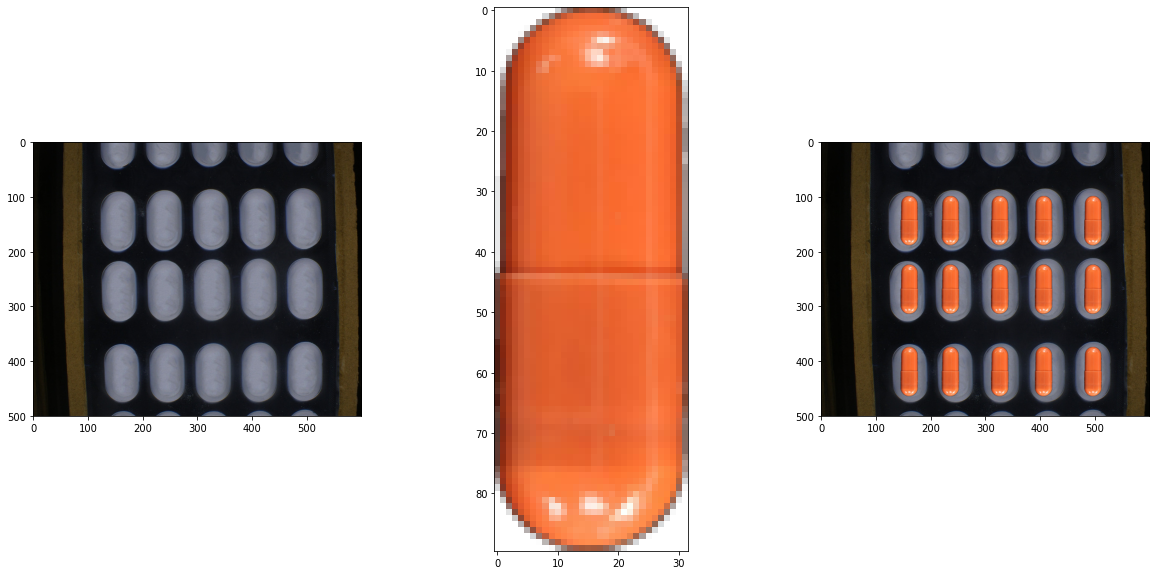

In [18]:
from PIL import Image, ImageFilter
scale = 6
im1 = Image.open('background/image_convert3.jpg')
im2 = Image.open('D1/1gfg0_2.png')

list_position_x = [145, 220, 310, 390, 480]
list_position_y = [100, 225, 375]

width, height = im2.size
im2 = im2.resize((int(width/scale), int(height/scale)))
im2 = im2.convert("RGBA")

back_im = im1.copy()
for i in list_position_x:
    for j in list_position_y:
        back_im.paste(im2, (i, j), im2)
back_im.save('D1/rocket_pillow_paste.png', quality=95,  format="png")
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(im1)
plt.subplot(132)
plt.imshow(im2)
plt.subplot(133)
plt.imshow(back_im)

In [22]:
import numpy as np
from PIL import Image

img_p = Image.open("D1/1gfg0_2.png")
print("mode =",img_p.mode)              #RGBA
# print(np.unique(np.array(img_p)))

img_rgb = img_p.convert(mode = "RGB")
print("mode =",img_rgb.mode)            #RGB
# print(np.unique(np.array(img_rgb)))

img_rgb = img_p.convert(mode = "P")
print("mode =",img_rgb.mode)            #P
# print(np.unique(np.array(img_rgb)))

img_rgb = img_p.convert(mode = "L")
print("mode =",img_rgb.mode)            #L
# print(np.unique(np.array(img_rgb)))

mode = RGBA
mode = RGB
mode = P
mode = L


## Find center of the images by python3.

In [23]:
import pandas as pd 
import numpy as np
import os

In [20]:
path_file = f"Dataof/labels_my-project-name_2023-03-22-11-12-24.csv"

In [21]:
df = pd.read_csv(path_file)
df.head(5)

,label_name,bbox_x,bbox_y,bbox_width,bbox_height,image_name,image_width,image_height
0,aA,120,90,69,114,image_Convert_data.jpg,600,501
1,aA,203,88,70,115,image_Convert_data.jpg,600,501
2,aA,288,87,72,113,image_Convert_data.jpg,600,501
3,aA,372,85,73,113,image_Convert_data.jpg,600,501
4,aA,458,83,70,116,image_Convert_data.jpg,600,501


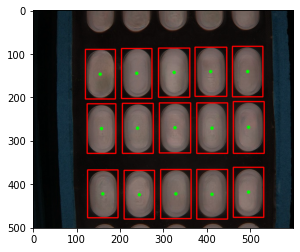

In [35]:
img_path = df["image_name"].loc[0]
img = cv2.imread(os.path.join("background", img_path))
ls_data = []
for i in range(df.shape[0]):
    x, y, w, h = df["bbox_x"].iloc[i], df["bbox_y"].iloc[i], df["bbox_width"].iloc[i], df["bbox_height"].iloc[i]
    center = (int(x+w/2), int(y+h/2))
    ls_data.append([int(x+w/2), int(y+h/2), w, h])
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    img = cv2.circle(img, center, radius=4, color=(0, 255, 0), thickness=-1)
plt.imshow(img)

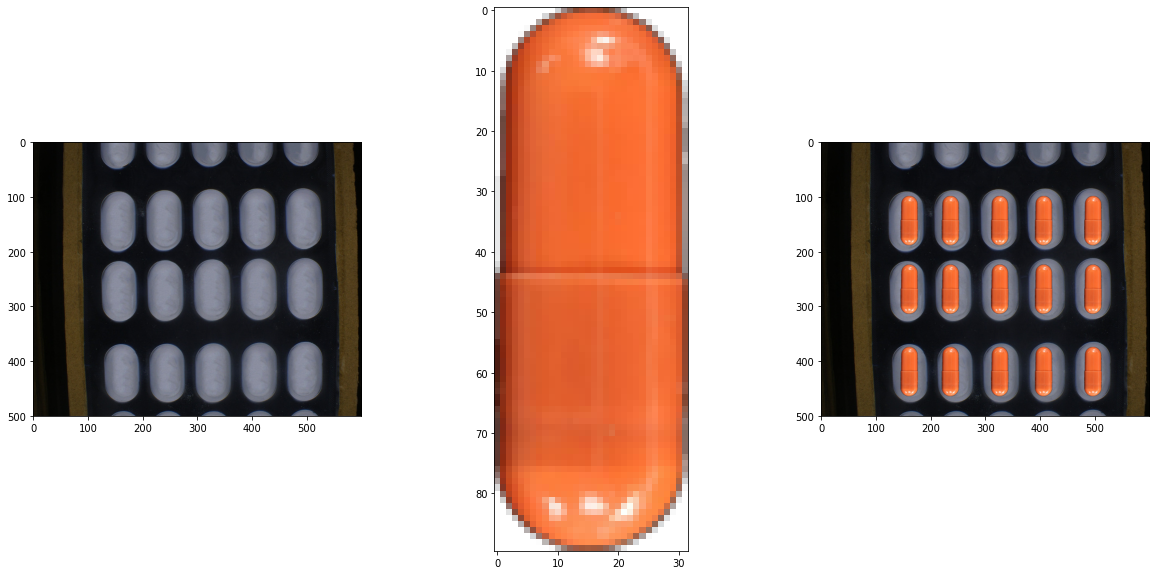

In [34]:
from PIL import Image, ImageFilter
scale = 6
im1 = Image.open('background/image_convert3.jpg')
im2 = Image.open('D1/1gfg0_2.png')

list_position_x = [145, 220, 310, 390, 480]
list_position_y = [100, 225, 375]

width, height = im2.size
im2 = im2.resize((int(width/scale), int(height/scale)))
im2 = im2.convert("RGBA")

back_im = im1.copy()
for i in list_position_x:
    for j in list_position_y:
        back_im.paste(im2, (i, j), im2)
back_im.save('D1/rocket_pillow_paste.png', quality=95,  format="png")
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(im1)
plt.subplot(132)
plt.imshow(im2)
plt.subplot(133)
plt.imshow(back_im)